## 概率
### 基本概率论

In [14]:
%matplotlib inline
import torch
from torch.distributions import multinomial # multinomial 多项式分布的包
from d2l import torch as d2l
import warnings
warnings.filterwarnings("ignore")

In [10]:
# 骰子每个1/6的概率，取一次样
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 1., 0., 0., 0., 0.])

In [11]:
# 取10次样
multinomial.Multinomial(10, fair_probs).sample()

tensor([1., 3., 0., 4., 1., 1.])

In [12]:
# 对骰子进行采样，我们可以模拟1000次投掷。然后，我们可以统计1000次投掷后,每个数字被投中了多少次。具体来说，我们计算相对频率作为真实概率的估计。
# 将结果存储为32位浮点数以进行除法
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000  # 相对频率作为估计值

tensor([0.1430, 0.1760, 0.1910, 0.1700, 0.1580, 0.1620])

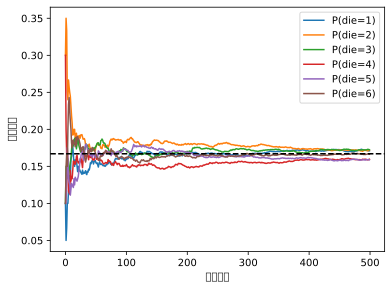

In [26]:
# 让我们进行500组实验，每组抽取10个样本。
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))

d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('实验次数')
d2l.plt.gca().set_ylabel('估算概率')
d2l.plt.legend();

<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=default"></script>

$$x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}$$

In [22]:
estimates

tensor([[0.2000, 0.2000, 0.1000, 0.0000, 0.4000, 0.1000],
        [0.3500, 0.1500, 0.1000, 0.1500, 0.2000, 0.0500],
        [0.3333, 0.1333, 0.0667, 0.2000, 0.2333, 0.0333],
        ...,
        [0.1671, 0.1637, 0.1661, 0.1616, 0.1743, 0.1673],
        [0.1667, 0.1639, 0.1659, 0.1617, 0.1743, 0.1673],
        [0.1672, 0.1638, 0.1658, 0.1616, 0.1742, 0.1674]])